Import Libraries


In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [16]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [17]:
#normalise the images (range of 0-1(minmax))
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [18]:
#normalise labels (one hot encoding)
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [19]:
#Build CNN
model=Sequential()    

#Add layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [20]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
history=model.fit(
    x_train,y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.35
)    

Epoch 1/15
305/305 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8181 - loss: 0.6578 - val_accuracy: 0.9679 - val_loss: 0.1058
Epoch 2/15
305/305 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9735 - loss: 0.0895 - val_accuracy: 0.9770 - val_loss: 0.0719
Epoch 3/15
305/305 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9844 - loss: 0.0541 - val_accuracy: 0.9810 - val_loss: 0.0609
Epoch 4/15
305/305 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9863 - loss: 0.0429 - val_accuracy: 0.9837 - val_loss: 0.0533
Epoch 5/15
305/305 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9889 - loss: 0.0348 - val_accuracy: 0.9859 - val_loss: 0.0473
Epoch 6/15
305/305 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9918 - loss: 0.0288 - val_accuracy: 0.9835 - val_loss: 0.0542
Epoch 7/15
305/305 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9917 - loss: 0.0239 - val_accuracy: 0.9840 - val_loss: 0.0566
Epoch 8/15
305/305 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9946 - loss: 0.0179 - val_accu

In [22]:
test_loss,test_accuracy=model.evaluate(x_test,y_test,verbose=2)
print(f'Test Accuracy :{test_accuracy:.4f}')

313/313 - 0s - 1ms/step - accuracy: 0.9892 - loss: 0.0447
Test Accuracy :0.9892


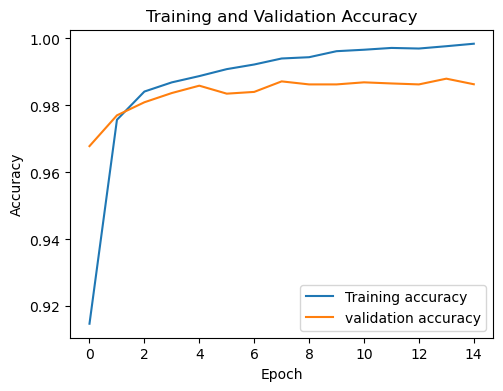

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

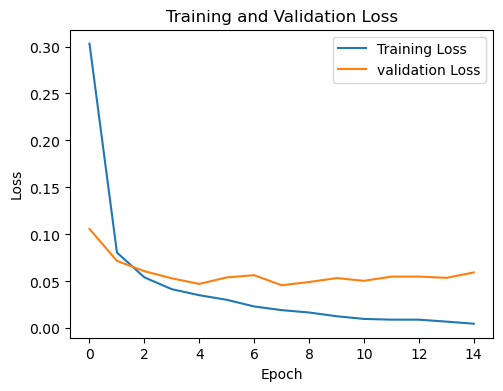

In [24]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()